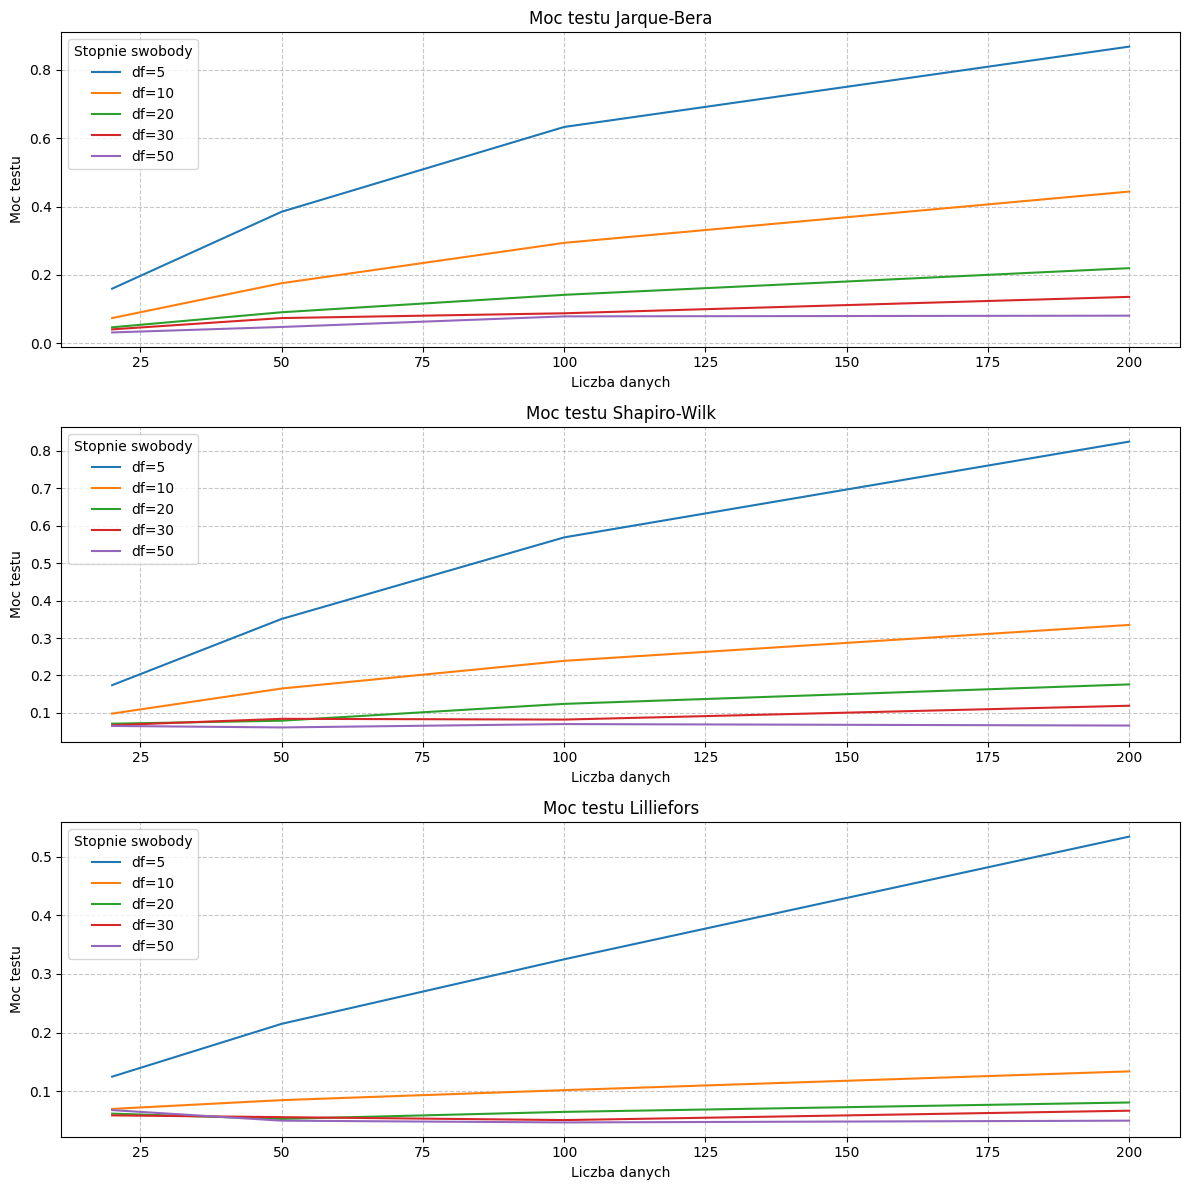

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, jarque_bera, shapiro
import statsmodels.api as sm

# Funkcja do generowania próbek z rozkładu t-Studenta
def generuj_probki_t_studenta(liczba_danych, stopnie_swobody):
    return t.rvs(stopnie_swobody, size=liczba_danych)

# Funkcja do obliczania mocy testów dla danych próbek
def oblicz_moc_testow(liczba_danych, stopnie_swobody, liczba_symulacji=1000):
    odrzucenia_JB = 0
    odrzucenia_SW = 0
    odrzucenia_LF = 0
    
    for _ in range(liczba_symulacji):
        probki = generuj_probki_t_studenta(liczba_danych, stopnie_swobody)
        
        # Test Jarque-Bera
        statystyka_JB, p_wartosc_JB = jarque_bera(probki)
        if p_wartosc_JB < 0.05:
            odrzucenia_JB += 1
        
        # Test Shapiro-Wilk
        _, p_wartosc_SW = shapiro(probki)
        if p_wartosc_SW < 0.05:
            odrzucenia_SW += 1
        
        # Test Lilliefors
        _, p_wartosc_LF = sm.stats.lilliefors(probki)
        if p_wartosc_LF < 0.05:
            odrzucenia_LF += 1
    
    moc_JB = odrzucenia_JB / liczba_symulacji
    moc_SW = odrzucenia_SW / liczba_symulacji
    moc_LF = odrzucenia_LF / liczba_symulacji
    
    return moc_JB, moc_SW, moc_LF

# Parametry
liczby_danych = [20, 50, 100, 200]
stopnie_swobody = [5, 10, 20, 30, 50]  # Dodaliśmy dwie dodatkowe wartości stopni swobody

# Obliczanie mocy testów dla różnych wielkości próbki i stopni swobody
moce_testow = np.zeros((len(liczby_danych), len(stopnie_swobody), 3))  # macierz do przechowywania mocy testów

for i, liczba_danych in enumerate(liczby_danych):
    for j, df in enumerate(stopnie_swobody):  # Zmieniamy nazwę zmiennej iterowanej w pętli
        moce_testow[i, j, :] = oblicz_moc_testow(liczba_danych, df)

# Wykresy
plt.figure(figsize=(12, 12))

# Wykres mocy testu Jarque-Bera
plt.subplot(3, 1, 1)
for j, df in enumerate(stopnie_swobody):
    plt.plot(liczby_danych, moce_testow[:, j, 0], label=f'df={df}')
plt.title('Moc testu Jarque-Bera')
plt.xlabel('Liczba danych')
plt.ylabel('Moc testu')
plt.legend(title='Stopnie swobody', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Wykres mocy testu Shapiro-Wilk
plt.subplot(3, 1, 2)
for j, df in enumerate(stopnie_swobody):
    plt.plot(liczby_danych, moce_testow[:, j, 1], label=f'df={df}')
plt.title('Moc testu Shapiro-Wilk')
plt.xlabel('Liczba danych')
plt.ylabel('Moc testu')
plt.legend(title='Stopnie swobody', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Wykres mocy testu Lilliefors
plt.subplot(3, 1, 3)
for j, df in enumerate(stopnie_swobody):
    plt.plot(liczby_danych, moce_testow[:, j, 2], label=f'df={df}')
plt.title('Moc testu Lilliefors')
plt.xlabel('Liczba danych')
plt.ylabel('Moc testu')
plt.legend(title='Stopnie swobody', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


W przeprowadzonym badaniu symulowano testy statystyczne na danych generowanych z rozkładu t-Studenta. Celem było zbadanie wpływu liczby próbek i stopni swobody na moc testów Jarque-Bera, Shapiro-Wilk i Lilliefors.

Parametry symulacji były następujące:
- Liczba symulacji: **1000**
- Liczba próbek (`num_data`): **20**, **50**, **100**, **200**
- Stopnie swobody (`degrees_freedom`): **5**, **10**, **20**, **30**, **50**

Dla każdej kombinacji parametrów `num_data` i `degrees_freedom`, przeprowadzono **1000** testów Jarque-Bera, Shapiro-Wilk i Lilliefors. Następnie obliczono moc każdego testu dla każdej kombinacji i przedstawiono wyniki na trzech wykresach.

Na podstawie wykresów można zauważyć, że moc testów generalnie rośnie wraz ze wzrostem liczby próbek. Może to sugerować, że zwiększenie liczby próbek prowadzi do większej mocy testów, co pozwala na lepsze wykrywanie różnic między obserwowanymi a oczekiwanymi częstościami.

Ponadto, dla danego `num_data`, moc testów generalnie maleje wraz ze wzrostem `degrees_freedom`. Może to sugerować, że zwiększenie stopni swobody rozkładu t-Studenta prowadzi do mniejszej mocy testów.

Wreszcie, dla danego `degrees_freedom`, moc testów generalnie rośnie wraz ze wzrostem `num_data`. Może to sugerować, że zwiększenie liczby próbek prowadzi do większej mocy testów.

Wszystkie te wnioski są jednak oparte na symulacjach i mogą nie odzwierciedlać rzeczywistości w każdym przypadku. Dlatego zawsze warto przeprowadzić dodatkowe analizy i testy, aby potwierdzić te wyniki. W szczególności, warto zauważyć, że testy Jarque-Bera, Shapiro-Wilk i Lilliefors mają różne założenia i mogą być bardziej lub mniej odpowiednie w zależności od konkretnego zestawu danych. Dlatego zawsze warto rozważyć, który test jest najbardziej odpowiedni do danego problemu.
